ARTI308 – Machine Learning
Lab 3: Exploratory Data Analysis (EDA)
EDA is the first and most important step in any Machine Learning project.
Before building models, we must understand:
• What does the data represent?
• Are there missing values?
• Are there outliers?
• What patterns exist?
• Which variables influence others?
If we do not understand the data, we cannot build a good model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
df = pd.read_csv("house.csv")

# Display first 5 rows
df.head()

,id,location,location_area,seller_type,type,partitioning,comfort,price,rooms_count,useful_surface,...,construction_year,real_estate_type,height_regime,level,max_level,kitchens_count,bathrooms_count,garages_count,parking_lots_count,balconies_count
0,101,"Bucuresti, Sector 6, zona Drumul Taberei",Drumul Taberei,agency,apartament,decomandat,lux,37400,2.0,65.0,...,2018.0,bloc de apartamente,S+P+6E,2,6.0,1.0,1.0,NaN,1.0,1.0
1,102,"Bucuresti, Sector 6, zona Drumul Taberei",Drumul Taberei,agency,apartament,semidecomandat,1,39900,2.0,65.0,...,2018.0,bloc de apartamente,P+6E,1,6.0,1.0,1.0,NaN,1.0,1.0
2,103,"Bucuresti, Sector 3, zona Dristor",Dristor,agency,apartament,decomandat,lux,90290,2.0,58.0,...,2020.0,bloc de apartamente,D+P+5E,4,5.0,1.0,1.0,1.0,1.0,1.0
3,104,"Bucuresti, zona Herastrau",Herastrau,agency,apartament,decomandat,lux,700000,5.0,233.0,...,2021.0,bloc de apartamente,D+P+5E,5,5.0,1.0,3.0,NaN,NaN,NaN
4,105,"Bucuresti, Sector 6, zona Militari",Militari,agency,apartament,decomandat,1,48000,2.0,42.0,...,2021.0,bloc de apartamente,D+P+10E,2,10.0,1.0,1.0,NaN,NaN,1.0


In [3]:
print(df.isna())

         id  location  location_area  seller_type   type  partitioning  \
0     False     False          False        False  False         False   
1     False     False          False        False  False         False   
2     False     False          False        False  False         False   
3     False     False          False        False  False         False   
4     False     False          False        False  False         False   
...     ...       ...            ...          ...    ...           ...   
8315  False     False          False        False  False         False   
8316  False     False          False        False  False         False   
8317  False     False          False        False  False         False   
8318  False     False          False        False  False         False   
8319  False     False          False        False  False         False   

      comfort  price  rooms_count  useful_surface  ...  construction_year  \
0       False  False        False 

In [4]:
print(df.isna().sum())

id                       0
location                 0
location_area            0
seller_type              0
type                     0
partitioning           174
comfort                255
price                    0
rooms_count              1
useful_surface          74
built_surface          921
construction_year      140
real_estate_type        39
height_regime          153
level                    1
max_level              202
kitchens_count        1163
bathrooms_count        318
garages_count         7820
parking_lots_count    6311
balconies_count       2102
dtype: int64


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
print("Shape (rows, columns): ", df.shape)
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Shape (rows, columns):  (8320, 21)
Number of rows: 8320
Number of columns: 21


In [7]:
df.dtypes

id                      int64
location               object
location_area          object
seller_type            object
type                   object
partitioning           object
comfort                object
price                   int64
rooms_count           float64
useful_surface        float64
built_surface         float64
construction_year     float64
real_estate_type       object
height_regime          object
level                  object
max_level             float64
kitchens_count        float64
bathrooms_count       float64
garages_count         float64
parking_lots_count    float64
balconies_count       float64
dtype: object

In [8]:
df.describe(include='all')

,id,location,location_area,seller_type,type,partitioning,comfort,price,rooms_count,useful_surface,...,construction_year,real_estate_type,height_regime,level,max_level,kitchens_count,bathrooms_count,garages_count,parking_lots_count,balconies_count
count,8320.000000,8320,8320,8320,8320,8146,8065,8.320000e+03,8319.000000,8246.000000,...,8180.000000,8281,8167,8319,8118.000000,7157.000000,8002.00000,500.000000,2009.000000,6218.000000
unique,NaN,412,187,2,1,5,4,NaN,NaN,NaN,...,NaN,2,99,22,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,"Bucuresti, Sector 4, zona Berceni",Berceni,agency,apartament,decomandat,1,NaN,NaN,NaN,...,NaN,bloc de apartamente,P+4E,1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,325,407,7800,8320,5918,5599,NaN,NaN,NaN,...,NaN,8108,953,1671,NaN,NaN,NaN,NaN,NaN,NaN
mean,15352.975481,NaN,NaN,NaN,NaN,NaN,NaN,1.373086e+05,2.545017,75.007155,...,2003.761614,NaN,NaN,NaN,6.688840,1.020400,1.50075,1.300000,1.546043,1.246381
std,9634.934716,NaN,NaN,NaN,NaN,NaN,NaN,1.738384e+05,0.959062,40.427642,...,22.566930,NaN,NaN,NaN,3.069841,0.869248,0.70000,3.232165,5.262435,0.564704
min,101.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+04,1.000000,4.000000,...,1873.000000,NaN,NaN,NaN,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
25%,7120.750000,NaN,NaN,NaN,NaN,NaN,NaN,6.500000e+04,2.000000,52.000000,...,1984.000000,NaN,NaN,NaN,4.000000,1.000000,1.00000,1.000000,1.000000,1.000000
50%,14318.500000,NaN,NaN,NaN,NaN,NaN,NaN,8.939150e+04,2.000000,65.000000,...,2018.000000,NaN,NaN,NaN,6.000000,1.000000,1.00000,1.000000,1.000000,1.000000
75%,23428.250000,NaN,NaN,NaN,NaN,NaN,NaN,1.420000e+05,3.000000,85.000000,...,2020.000000,NaN,NaN,NaN,9.000000,1.000000,2.00000,1.000000,1.000000,1.000000


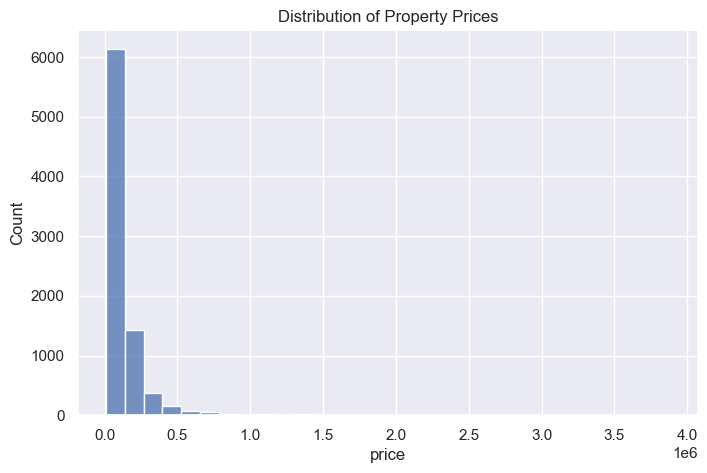

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=30)
plt.title("Distribution of Property Prices")
plt.show()

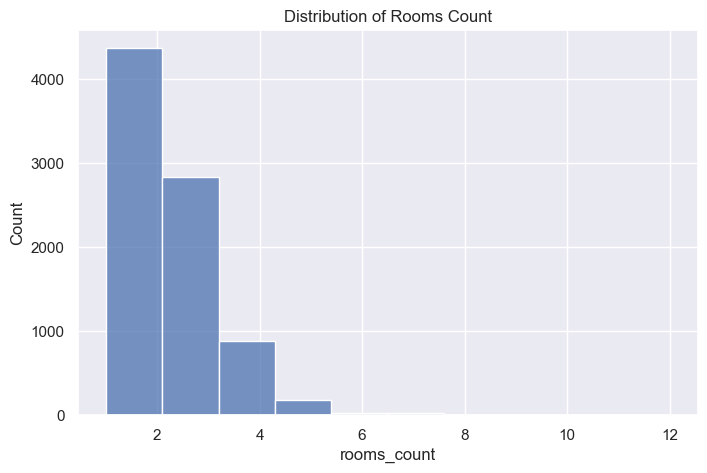

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['rooms_count'], bins=10)
plt.title("Distribution of Rooms Count")
plt.show()

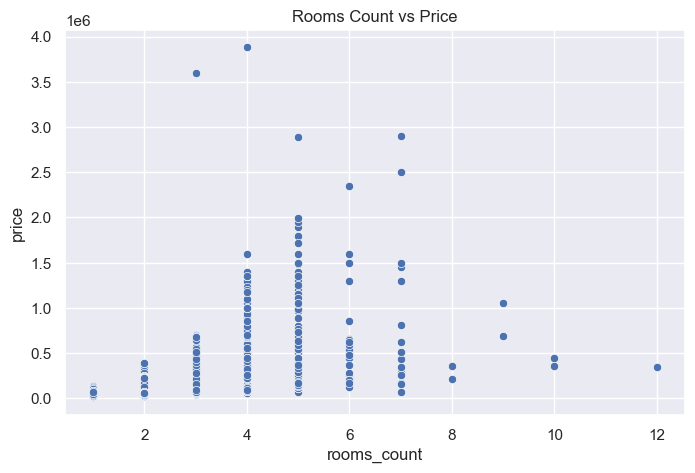

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='rooms_count', y='price', data=df)
plt.title("Rooms Count vs Price")
plt.show()

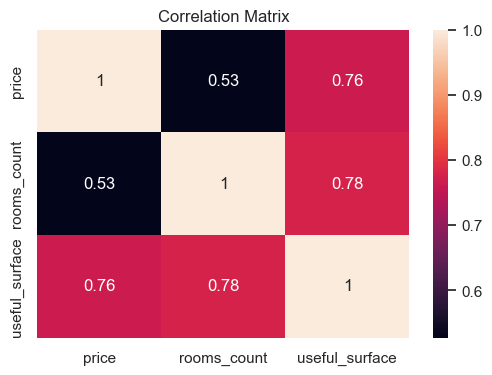

In [12]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['price','rooms_count','useful_surface']].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

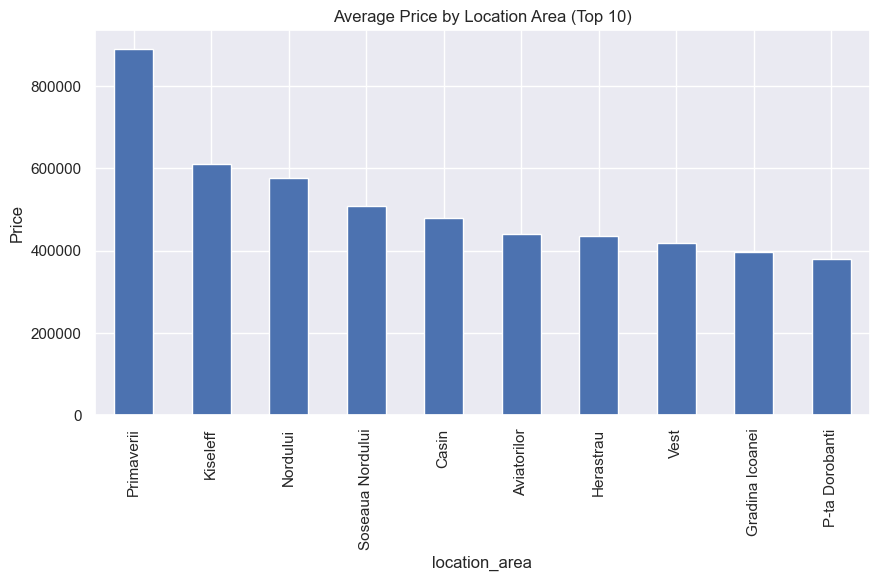

In [13]:
area_price = df.groupby('location_area')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
area_price.head(10).plot(kind='bar')
plt.title("Average Price by Location Area (Top 10)")
plt.ylabel("Price")
plt.show()

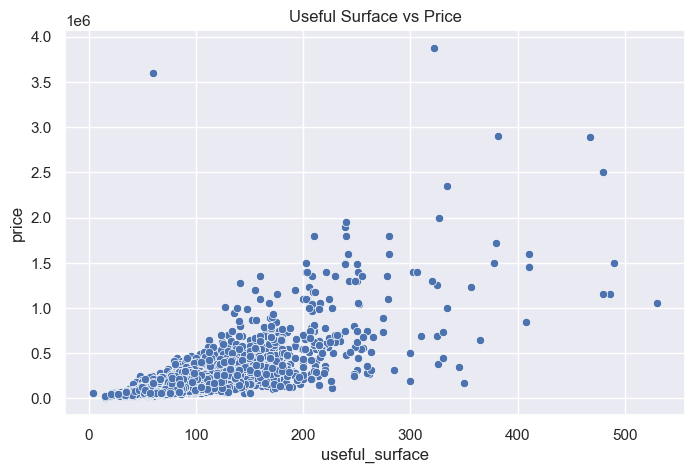

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='useful_surface', y='price', data=df)
plt.title("Useful Surface vs Price")
plt.show()

The dataset contains 8320 rows and 21 columns.

Several columns contain missing values, especially garages_count, parking_lots_count,
balconies_count, and kitchens_count. No duplicate rows were found.

Price distribution is highly right-skewed with strong outliers.
Most properties have between 2 and 3 rooms.

There is a positive relationship between price and both rooms count and useful surface,
although the variance is high.

EDA helped identify missing values, outliers, and relationships between variables,
which is essential before building any machine learning model.

